---
jupyter:
  hide_input: true
header-includes:
  - \usepackage{graphicx}
  - \usepackage{caption}
  - \usepackage{float}
---

## **Analiza niestabilności Turinga** {-}
Graficzne przedstawienie zjawska analizy niesstabilności Turinga.

In [2]:
import sys
import os

# Dodanie katalogu głównego repo do ścieżki
sys.path.append(os.path.abspath(".."))

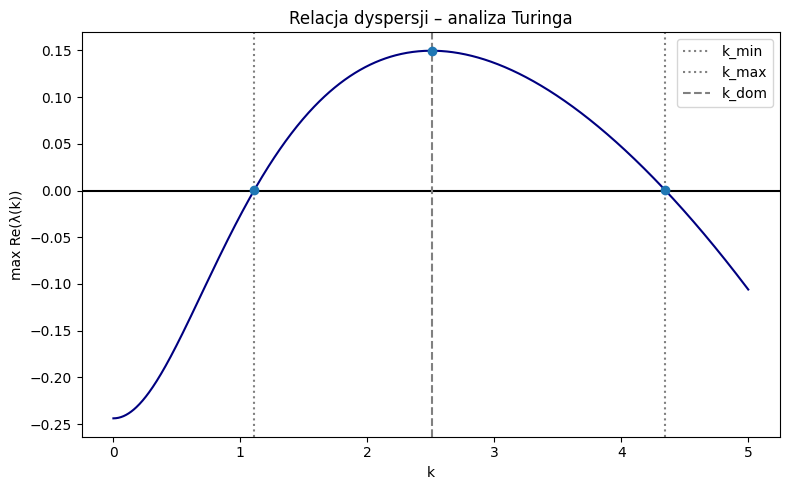

In [2]:
from pipeline.turing_instability import turing_analysis, plot_dispersion

# Parametry do ustawienia
a = 1
m = 0.45
d1 = 1.5
d2 = 0.02

# Wykres i wyniki
results = turing_analysis(a, m, d1, d2)
plot_dispersion(results["k"], results["lambda"], results["band"])